In [3]:
import numpy as np
import pandas as pd
import sklearn
import os
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split, StratifiedKFold
from matplotlib import pyplot as plt
import seaborn as sns

**Dataset**

In [4]:
datasetPath = os.path.join("dataset","winequality-white.csv")
dataset = pd.read_csv(datasetPath,";")

In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Data Exploration**
Target variable exploration

In [6]:
qualityMin = min(dataset['quality'])
qualityMax = max(dataset['quality'])
print(f"Min quality: {qualityMin}")
print(f"Max quality: {qualityMax}")
n_bins = list(range(qualityMin,qualityMax+1))

Min quality: 3
Max quality: 9


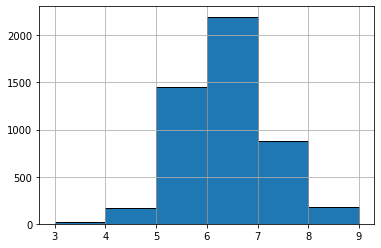

In [7]:
plt.figure()
plt.hist(dataset["quality"], n_bins, edgecolor= "black")
plt.grid()
plt.show()

**Feature Exploration**

In [8]:
for i in n_bins:
    print(f"Quality {i} wines: {len(dataset.loc[dataset['quality']==i])}")

Quality 3 wines: 20
Quality 4 wines: 163
Quality 5 wines: 1457
Quality 6 wines: 2198
Quality 7 wines: 880
Quality 8 wines: 175
Quality 9 wines: 5


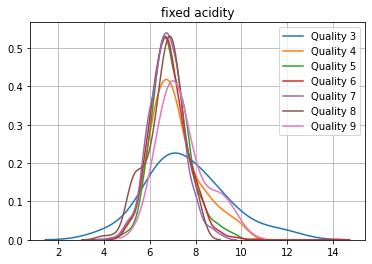

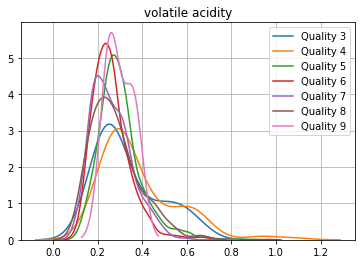

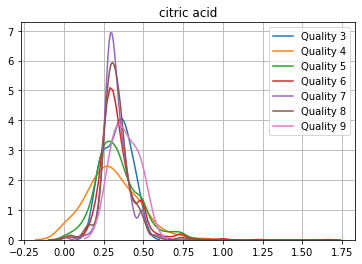

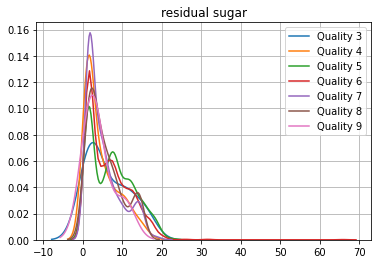

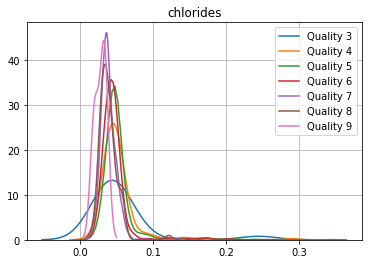

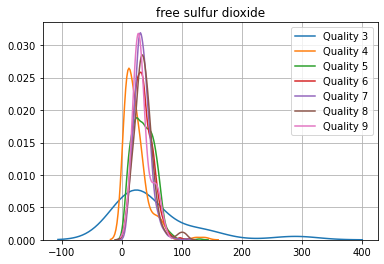

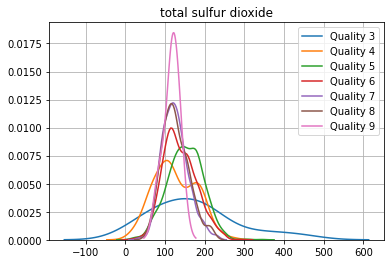

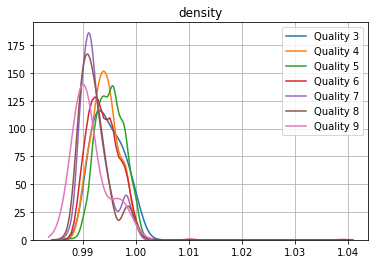

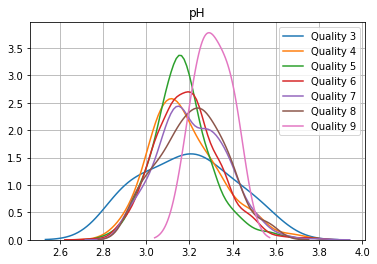

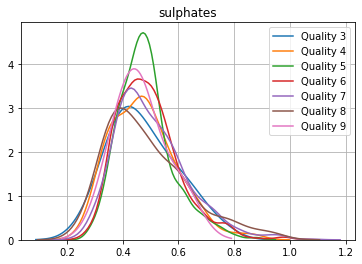

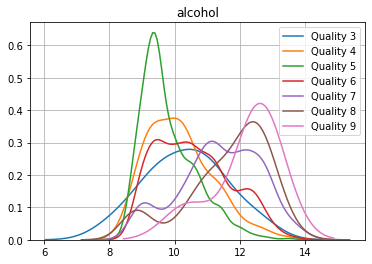

In [9]:
feature_names = list(dataset.columns)[:-1] # delete quality
for i,feature in enumerate(feature_names):
    # subset = dataset[feature]
    plt.figure()
    plt.grid()
    plt.title(feature)
    for j in n_bins:   
        sns.kdeplot(dataset.loc[dataset["quality"]==j, feature], label= f"Quality {j}", kernel="gau")
    

**Standardization**

In [10]:
dsNorm = dataset.copy()
for i, feature in enumerate(feature_names):
    dsNorm[[feature]] = ss(with_mean=True, with_std=True).fit_transform(dsNorm[[feature]]) 

**Correlation Matrix**

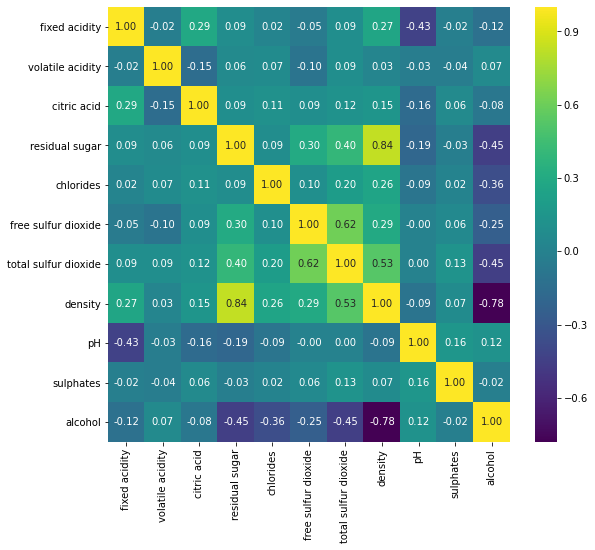

In [11]:
plt.figure(figsize=(9,8))
sns.heatmap(dsNorm[feature_names].corr("pearson"), annot=True, fmt=".2f", cmap="viridis")

Given a threshold of +-0.40 there are a lot of correlated features:
 1. alcohol and density 
 2. residual sugar and density
 3. residual sugar and alchool
 4. alchol and total sulfer dioxide
 5. pH and fixed acidity
 6. density and total total sulfer dioxide
 7. total sulfur dioxide and free sulfur dioxide
 8. total sulfur dioxide and residul sugar

**Model Validation**

Holdout method

In [14]:
trainSet, tempSet = train_test_split(dsNorm, train_size = 0.75, random_state=42)
valSet, testSet = train_test_split(tempSet, train_size = 0.75, random_state=42)

print(f"Train set: {len(trainSet)}")
print(f"Validation set: {len(valSet)}")
print(f"Test set: {len(testSet)}")


Train set: 3673
Validation set: 918
Test set: 307


**Models Selection**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

In [38]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(trainSet[feature_names],trainSet["quality"])
prediction = dtc.predict(valSet[feature_names])
print(accuracy_score(valSet["quality"], prediction))
print(recall_score(valSet["quality"], prediction, average="micro"))
print(precision_score(valSet["quality"], prediction, average="micro"))
print(f1_score(valSet["quality"], prediction, average="micro"))

0.6023965141612201
0.6023965141612201
0.6023965141612201
0.6023965141612201
